<a href="https://colab.research.google.com/github/EmmarieR/CNM-DeepDive-Data-Science-Projects/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


Emmarie Ryan
_____
April 4th 2025


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [ ]:
# Install the sqlite package for Ubuntu
import sqlite3 as db
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
# download the Chinook sqlite database
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!rm -f chinook.db

In [ ]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT name FROM sqlite_master WHERE type='table';

name           
---------------
albums         
sqlite_sequence
artists        
customers      
employees      
genres         
invoices       
invoice_items  
media_types    
playlists      
playlist_track 
tracks         
sqlite_stat1   


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT * FROM sqlite_sequence;

name           seq 
-------------  ----
genres         25  
media_types    5   
artists        275 
albums         347 
tracks         3503
employees      8   
customers      59  
invoices       412 
invoice_items  2240
playlists      18  


###SELECT, COUNT, DISTINCT – unique countries

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(DISTINCT Country)
AS UniqueCountries
FROM customers;

UniqueCountries
---------------
24             


###SELECT, WHERE, AND, OR – customers from USA or Canada with .com emails


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT FirstName, LastName, Email, Country, State, City
FROM customers
WHERE (Country = 'USA' OR Country = 'Canada') AND Email LIKE '%.com';

FirstName  LastName    Email                     Country  State  City          
---------  ----------  ------------------------  -------  -----  --------------
François   Tremblay    ftremblay@gmail.com       Canada   QC     Montréal      
Frank      Harris      fharris@google.com        USA      CA     Mountain View 
Jack       Smith       jacksmith@microsoft.com   USA      WA     Redmond       
Michelle   Brooks      michelleb@aol.com         USA      NY     New York      
Tim        Goyer       tgoyer@apple.com          USA      CA     Cupertino     
Dan        Miller      dmiller@comcast.com       USA      CA     Mountain View 
Kathy      Chase       kachase@hotmail.com       USA      NV     Reno          
Heather    Leacock     hleacock@gmail.com        USA      FL     Orlando       
John       Gordon      johngordon22@yahoo.com    USA      MA     Boston        
Frank      Ralston     fralston@gmail.com        USA      IL     Chicago       
Victor     Stevens     vstevens@yahoo.co

### MAX, MIN – longest and shortest tracks

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT MAX(Milliseconds) AS LongestTrack, MIN(Milliseconds) AS ShortestTrack
FROM tracks;


LongestTrack  ShortestTrack
------------  -------------
5286953       1071         


### ORDER BY, LIMIT – top 5 longest tracks that cost $1.99


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT Name, Milliseconds, UnitPrice
FROM tracks
WHERE UnitPrice = 1.99
ORDER BY Milliseconds DESC
LIMIT 5;


Name                         Milliseconds  UnitPrice
---------------------------  ------------  ---------
Occupation / Precipice       5286953       1.99     
Through a Looking Glass      5088838       1.99     
Greetings from Earth, Pt. 1  2960293       1.99     
The Man With Nine Lives      2956998       1.99     
Battlestar Galactica, Pt. 2  2956081       1.99     


### BETWEEN – tracks with medium duration (milliseconds)


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT Name, Milliseconds
FROM tracks
WHERE Milliseconds BETWEEN 250000 AND 350000;


Name                                                                                                Milliseconds
--------------------------------------------------------------------------------------------------  ------------
For Those About To Rock (We Salute You)                                                             343719      
Balls to the Wall                                                                                   342562      
Restless and Wild                                                                                   252051      
Evil Walks                                                                                          263497      
Breaking The Rules                                                                                  263288      
Spellbound                                                                                          270863      
Go Down                                                                                         

###SUM – total revenue


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT SUM(Total) AS TotalRevenue
FROM invoices;


TotalRevenue
------------
2328.6      


### AVG, GROUP BY, ORDER BY – average invoice total per billing country


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT BillingCountry, AVG(Total) AS AverageInvoice
FROM invoices
GROUP BY BillingCountry
ORDER BY AverageInvoice DESC;


BillingCountry  AverageInvoice  
--------------  ----------------
Chile           6.66            
Ireland         6.51714285714286
Hungary         6.51714285714286
Czech Republic  6.44571428571429
Austria         6.08857142857143
Finland         5.94571428571429
Netherlands     5.80285714285714
India           5.78923076923077
USA             5.74791208791209
Norway          5.66            
Germany         5.58857142857143
France          5.57428571428571
Sweden          5.51714285714286
Portugal        5.51714285714286
Brazil          5.43142857142857
Canada          5.42785714285714
Poland          5.37428571428571
Italy           5.37428571428571
Denmark         5.37428571428571
Australia       5.37428571428571
Argentina       5.37428571428571
United Kingdom  5.37428571428571
Spain           5.37428571428571
Belgium         5.37428571428571


### JOIN, GROUP BY, COUNT – number of tracks per genre



In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT genres.Name, COUNT(tracks.TrackId) AS NumberOfTracks
FROM genres
JOIN tracks ON genres.GenreId = tracks.GenreId
GROUP BY genres.Name
ORDER BY NumberOfTracks DESC;


Name                NumberOfTracks
------------------  --------------
Rock                1297          
Latin               579           
Metal               374           
Alternative & Punk  332           
Jazz                130           
TV Shows            93            
Blues               81            
Classical           74            
Drama               64            
R&B/Soul            61            
Reggae              58            
Pop                 48            
Soundtrack          43            
Alternative         40            
Hip Hop/Rap         35            
Electronica/Dance   30            
World               28            
Heavy Metal         28            
Sci Fi & Fantasy    26            
Easy Listening      24            
Comedy              17            
Bossa Nova          15            
Science Fiction     13            
Rock And Roll       12            
Opera               1             


####CTE – genres with more than 50 tracks



In [ ]:
%%script sqlite3 --column --header chinook.db
WITH GenreCounts AS (
    SELECT genres.Name, COUNT(tracks.TrackId) AS NumberOfTracks
    FROM genres
    JOIN tracks ON genres.GenreId = tracks.GenreId
    GROUP BY genres.Name
    ORDER BY NumberOfTracks DESC
)
SELECT Name, NumberOfTracks
FROM GenreCounts
WHERE NumberOfTracks > 50;


Name                NumberOfTracks
------------------  --------------
Rock                1297          
Latin               579           
Metal               374           
Alternative & Punk  332           
Jazz                130           
TV Shows            93            
Blues               81            
Classical           74            
Drama               64            
R&B/Soul            61            
Reggae              58            


### JOIN, WHERE, LIKE – Tracks by AC/DC with “Rock” in the name


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT tracks.Name FROM tracks
JOIN albums ON tracks.AlbumId = albums.AlbumId
JOIN artists ON albums.ArtistId = artists.ArtistId
WHERE artists.Name = 'AC/DC' AND tracks.Name LIKE '%Rock%';


Name                                   
---------------------------------------
For Those About To Rock (We Salute You)
Let There Be Rock                      


### JOIN, GROUP BY, SUM, ORDER BY, LIMIT – top spending customer


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT customers.FirstName, customers.LastName, SUM(invoices.Total) AS TotalSpent
FROM customers
JOIN invoices ON customers.CustomerId = invoices.CustomerId
GROUP BY customers.CustomerId
ORDER BY TotalSpent DESC
LIMIT 1;


FirstName  LastName  TotalSpent
---------  --------  ----------
Helena     Holý      49.62     


### Prediction model using Matplotlib + SQL


####Plot invoice totals versus number of purchased tracks:

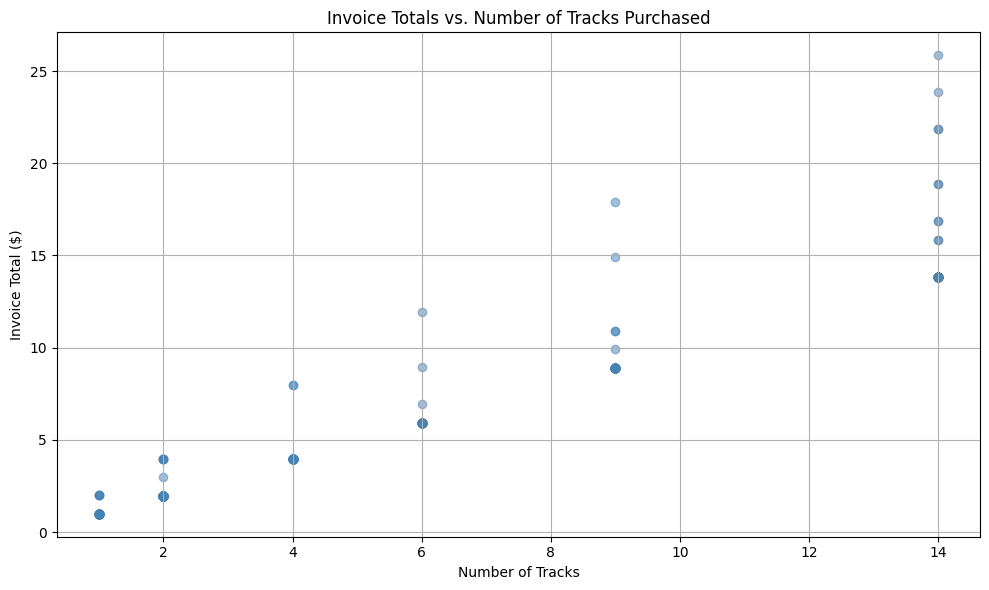

In [ ]:
# connect to the SQLite database
conn = db.connect('chinook.db')

# query: invoice totals vs. number of tracks purchased per invoice
query = """
SELECT invoices.InvoiceId, COUNT(invoice_items.TrackId) AS NumTracks, invoices.Total
FROM invoices
JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
GROUP BY invoices.InvoiceId;
"""

# load data into a DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# plot
plt.figure(figsize=(10, 6))
plt.scatter(df['NumTracks'], df['Total'], alpha=.5, color='steelblue')
plt.title('Invoice Totals vs. Number of Tracks Purchased')
plt.xlabel('Number of Tracks')
plt.ylabel('Invoice Total ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Linear regression model



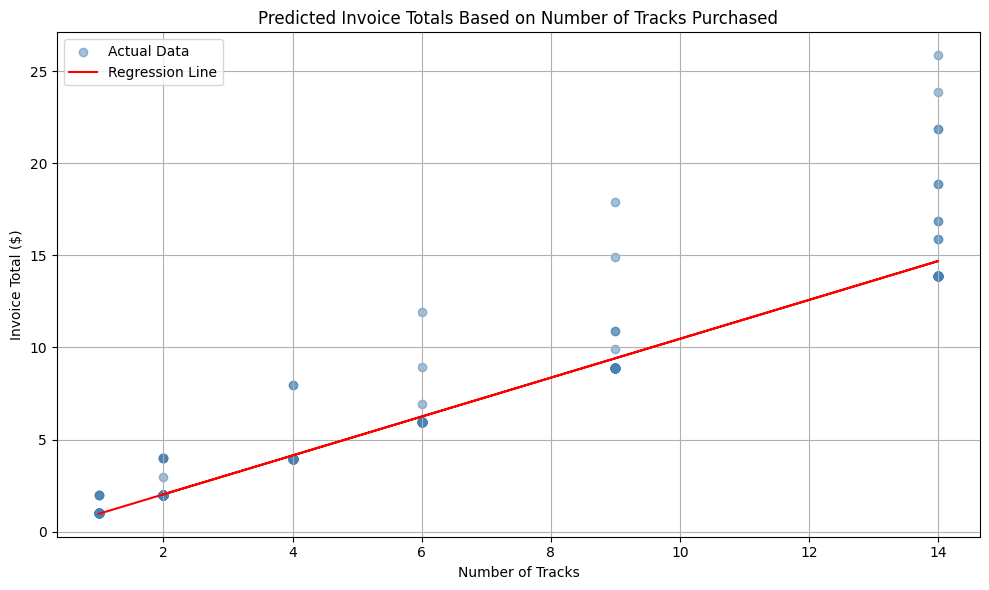

Model Equation: Total = 1.06 * NumTracks + -0.09
R² Score: 0.9337


In [ ]:
# call features (X) and target (y)
X = df[['NumTracks']]
y = df['Total']

# fit a linear regression model
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, color='steelblue', label='Actual Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.title('Predicted Invoice Totals Based on Number of Tracks Purchased')
plt.xlabel('Number of Tracks')
plt.ylabel('Invoice Total ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# print model coefficients and R² score
print(f"Model Equation: Total = {model.coef_[0]:.2f} * NumTracks + {model.intercept_:.2f}")
print(f"R² Score: {r2_score(y, predictions):.4f}")


#### Cross Validation

In [ ]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True)
model = LinearRegression()

print("Cross-validation results:\n")

fold = 1
r2_scores = []
rmse_scores = []
rmspe_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    r2_scores.append(r2)
    rmse_scores.append(rmse)

    rmspe_scores.append(np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100)

    print(f"Fold {fold}: R² = {r2:.4f}, RMSE = {rmse:.4f}")
    fold += 1

print('\nAverage R²: {:.4f}'.format(np.mean(r2_scores)))
print('Average RMSE: {:.4f}'.format(np.mean(rmse_scores)))
print('Average RMSPE: {:.4f}'.format(np.mean(rmspe_scores)))

Cross-validation results:

Fold 1: R² = 0.9288, RMSE = 1.2330
Fold 2: R² = 0.9280, RMSE = 1.4599
Fold 3: R² = 0.9246, RMSE = 1.2453
Fold 4: R² = 0.9331, RMSE = 1.1422
Fold 5: R² = 0.9525, RMSE = 0.9812

Average R²: 0.9334
Average RMSE: 1.2123
Average RMSPE: 10.8238
